<a href="https://colab.research.google.com/github/ahcamachod/1819-clustering-extrayendo-patrones-de-datos/blob/main/clustering_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering: Extrayendo patrones de datos
En este notebook estaremos analizando patrones en el comportamiento de clientes de tarjeta de crédito empleando un dataset de Kaggle llamado CC GENERAL.csv.

Dicho análisis estará sujeto a los resultados obtenidos a través de una técnica de aprendizaje no supervisada llamada clustering.

Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

# 1. Bibliotecas utilizadas
Las versiones de las bibliotecas que usaremos son las siguientes:




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# print(f'matplotlib --> {matplotlib.__version__}')
# print(f'pandas --> {pd.__version__}')
# print(f'numpy --> {np.__version__}')
# print(f'seaborn --> {sns.__version__}')
# print(f'sklearn --> {sklearn.__version__}')

# 2. Obteniendo los *clusters* y entendiendo criterios y métricas de validación

In [2]:
dataset = pd.read_csv('CC GENERAL.csv', sep=',')
dataset.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Quitamos las columnas con datos a no usar
dataset.drop(columns=['CUST_ID','TENURE'], axis=1,inplace=True)
dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [5]:
missing = dataset.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [6]:
dataset.fillna(dataset.median(), inplace=True)
missing = dataset.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

### Normalizando los datos

In [7]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataset.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,n_init=10,max_iter=300)
y_pred = kmeans.fit_predict(values)

## Calculando el coeficiente de Silhouette

In [9]:
from sklearn import metrics

labels = kmeans.labels_

silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3645139131518675


# 3. Entendiendo y calculando el índice Davies-Bouldin

In [10]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.075397956879484

# 4. Entendiendo y calculando el índice Calinski-Harabasz

In [11]:
calinski = metrics.calinski_harabasz_score(values,labels)
calinski

3431.801223417574

In [12]:
scores = []
for s in range(3, 11):
  score = {}
  # KMeans
  kmeans = KMeans(n_clusters=s, n_init=10, max_iter=300)
  y_pred = kmeans.fit_predict(values)

  # Labels
  labels = kmeans.labels_

  # Métricas
  score['N_Clusters'] = s
  score['Silhouette'] = metrics.silhouette_score(values, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(values, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(values, labels)

  # Almacenar resultados
  scores.append(score)

# Tabla de resultados
table = pd.DataFrame(scores)
table
# Mostrar tabla
# print(table.to_string())


,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.327186,1.310113,3526.457150
1,4,0.348257,1.221290,3528.717622
2,5,0.364485,1.075714,3431.793743
3,6,0.364847,1.045417,3523.517000
4,7,0.327679,1.151786,3398.401102
5,8,0.348628,1.126211,3213.500877
6,9,0.302492,1.195287,3082.961785
7,10,0.351378,1.116765,3019.209315


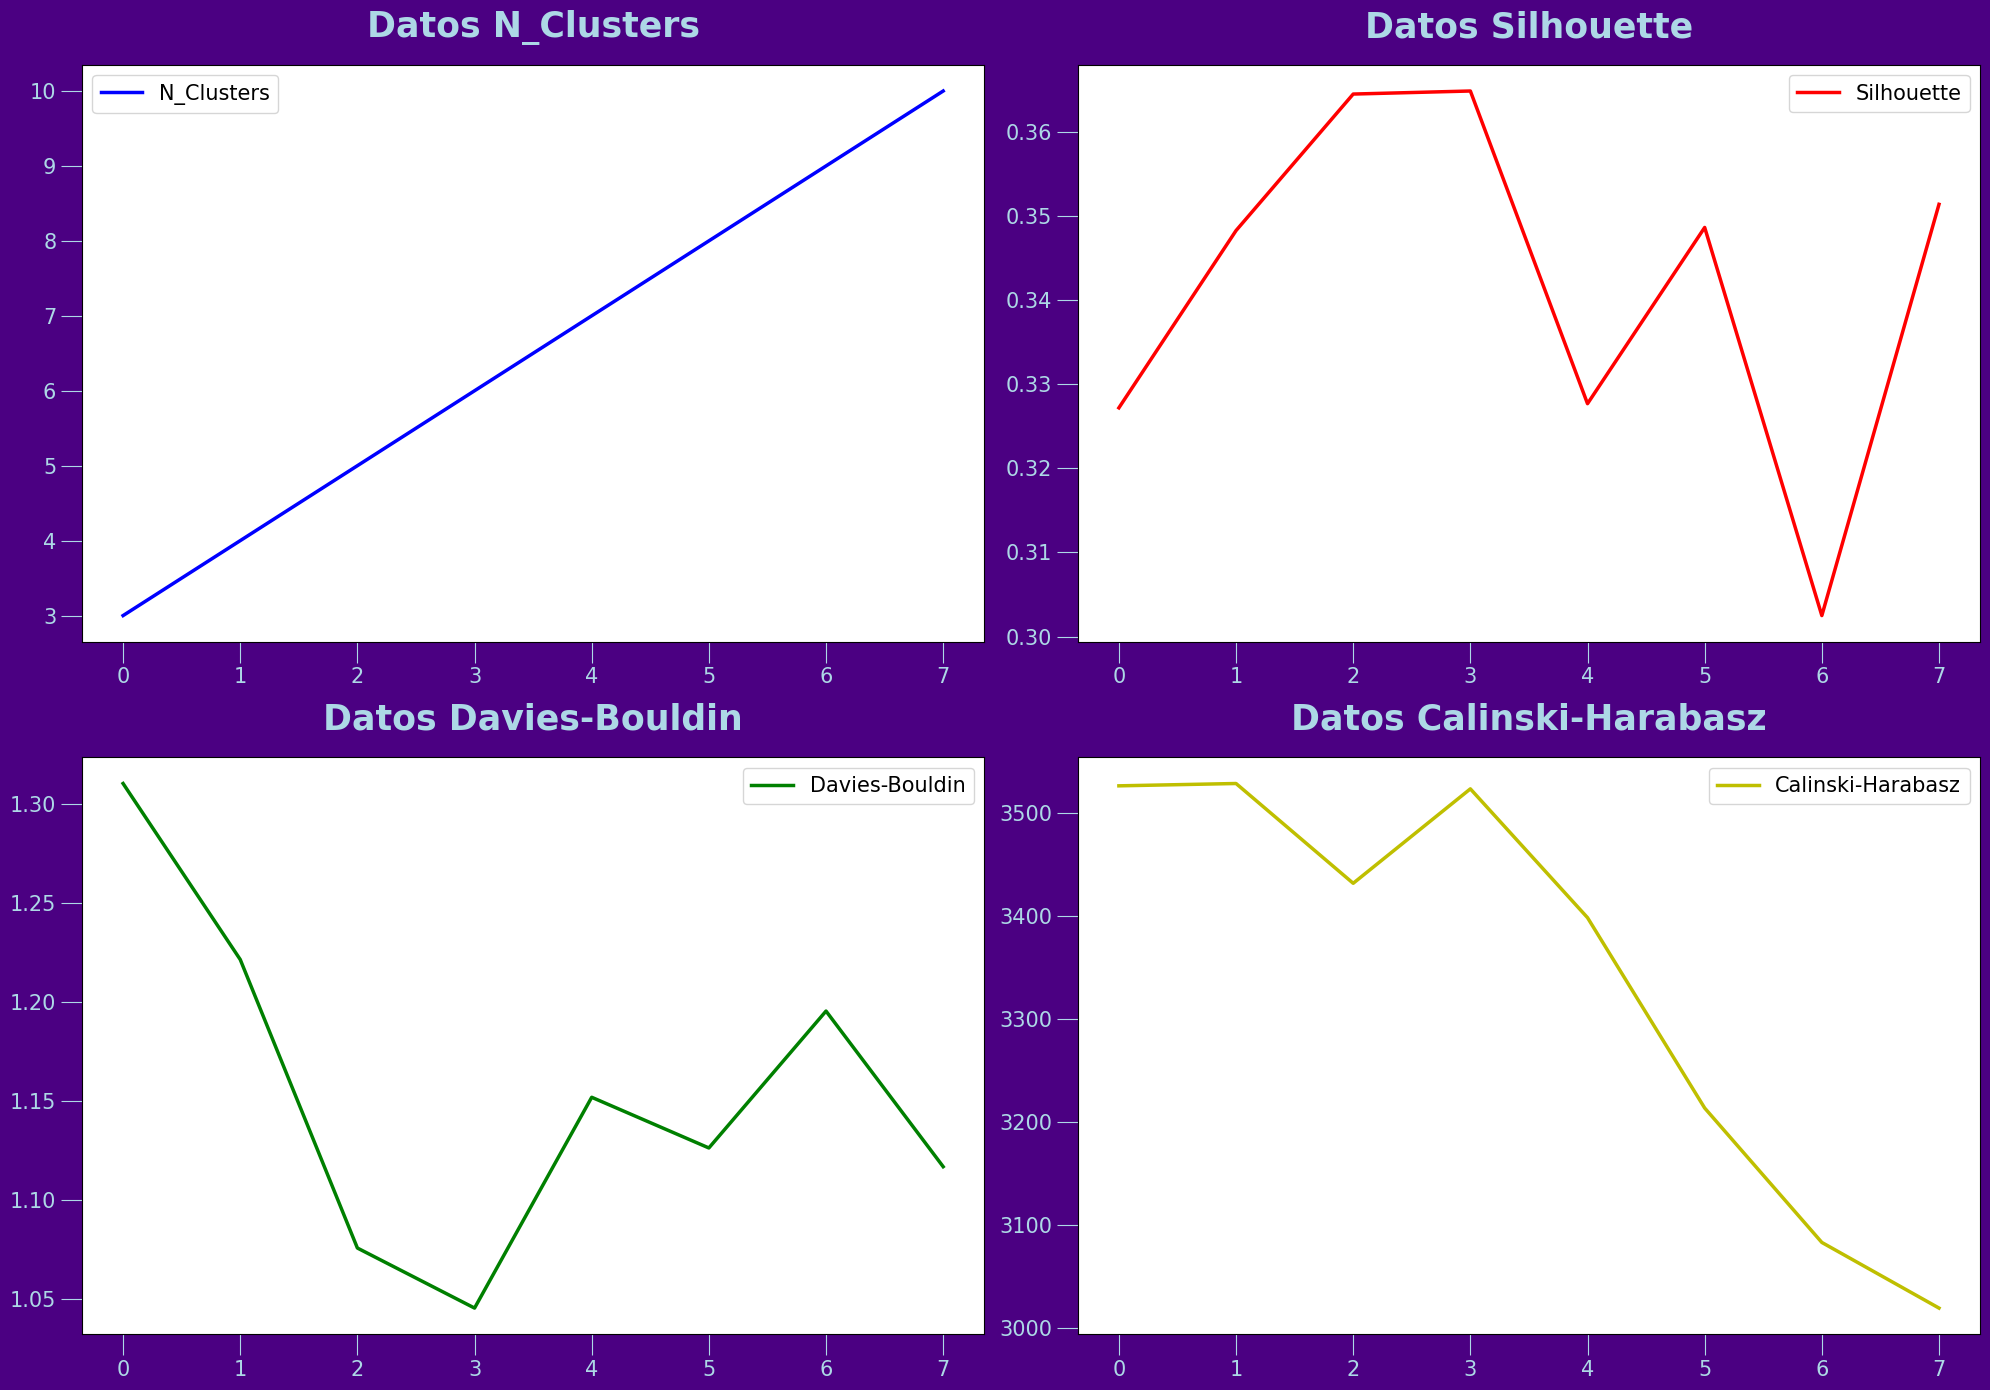

In [13]:
def grafico():
    fig, axs = plt.subplots(2, 2, figsize=(20, 14), facecolor='indigo')
    
    axs[0, 0].plot(table['N_Clusters'], color='b', linewidth=2.5)
    axs[0, 0].set_title('Datos N_Clusters', size=25, color='lightblue', fontweight='bold', pad=20)
    axs[0, 0].tick_params(axis='x', colors='lightblue', size=15, labelsize=15)
    axs[0, 0].tick_params(axis='y', colors='lightblue', size=15, labelsize=15)
    axs[0, 0].legend(['N_Clusters'], loc='best', fontsize=15)
    
    axs[0, 1].plot(table['Silhouette'], color='r', linewidth=2.5)
    axs[0, 1].set_title('Datos Silhouette', size=25, color='lightblue', fontweight='bold', pad=20)
    axs[0, 1].tick_params(axis='x', colors='lightblue', size=15, labelsize=15)
    axs[0, 1].tick_params(axis='y', colors='lightblue', size=15, labelsize=15)
    axs[0, 1].legend(['Silhouette'], loc='best', fontsize=15)
    
    axs[1, 0].plot(table['Davies-Bouldin'], color='g', linewidth=2.5)
    axs[1, 0].set_title('Datos Davies-Bouldin', size=25, color='lightblue', fontweight='bold', pad=20)
    axs[1, 0].tick_params(axis='x', colors='lightblue', size=15, labelsize=15)
    axs[1, 0].tick_params(axis='y', colors='lightblue', size=15, labelsize=15)
    axs[1, 0].legend(['Davies-Bouldin'], loc='best', fontsize=15)
    
    axs[1, 1].plot(table['Calinski-Harabasz'], color='y', linewidth=2.5)
    axs[1, 1].set_title('Datos Calinski-Harabasz', size=25, color='lightblue', fontweight='bold', pad=20)
    axs[1, 1].tick_params(axis='x', colors='lightblue', size=15, labelsize=15)
    axs[1, 1].tick_params(axis='y', colors='lightblue', size=15, labelsize=15)
    axs[1, 1].legend(['Calinski-Harabasz'], loc='best', fontsize=15)
    
    plt.tight_layout()
    plt.show()

grafico()


In [14]:
random_data = np.random.rand(8950,16)

scores = []
for s in range(3, 11):
  score = {}
  # KMeans
  kmeans = KMeans(n_clusters=s, n_init=10, max_iter=300)
  y_pred = kmeans.fit_predict(random_data)

  # Labels
  labels = kmeans.labels_

  # Métricas
  score['N_Clusters'] = s
  score['Silhouette'] = metrics.silhouette_score(random_data, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(random_data, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(random_data, labels)

  # Almacenar resultados
  scores.append(score)

# Tabla de resultados
random_table = pd.DataFrame(scores)
random_table
# Mostrar tabla
# print(table.to_string())


,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.040535,3.995436,375.713315
1,4,0.040660,3.873642,337.452317
2,5,0.039138,3.486148,301.603571
3,6,0.039209,3.308575,279.901312
4,7,0.039390,3.191964,261.430244
5,8,0.040805,3.088792,248.813732
6,9,0.040732,2.969375,235.740610
7,10,0.040495,2.897434,223.593106


In [15]:
set1,set2,set3 = np.array_split(values,3)
sets = [set1,set2,set3]

scores = []
for set in sets:
  score = {}
  # KMeans
  n = 1
  kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300)
  y_pred = kmeans.fit_predict(set)

  # Labels
  labels = kmeans.labels_

  # Métricas
  score['Set'] = f'set{n}'
  n += 1
  score['Silhouette'] = metrics.silhouette_score(set, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(set, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(set, labels)

  # Almacenar resultados
  scores.append(score)

# Tabla de resultados
estability_table = pd.DataFrame(scores)
estability_table

,Set,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,set1,0.364352,1.022990,1192.368792
1,set1,0.365176,1.059931,1169.466893
2,set1,0.372289,1.041837,1184.794477


# 5. Validando y visualizando los *clusters*

In [16]:
kmeans = KMeans(n_clusters=s, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_

dataset['CLUSTER'] = labels

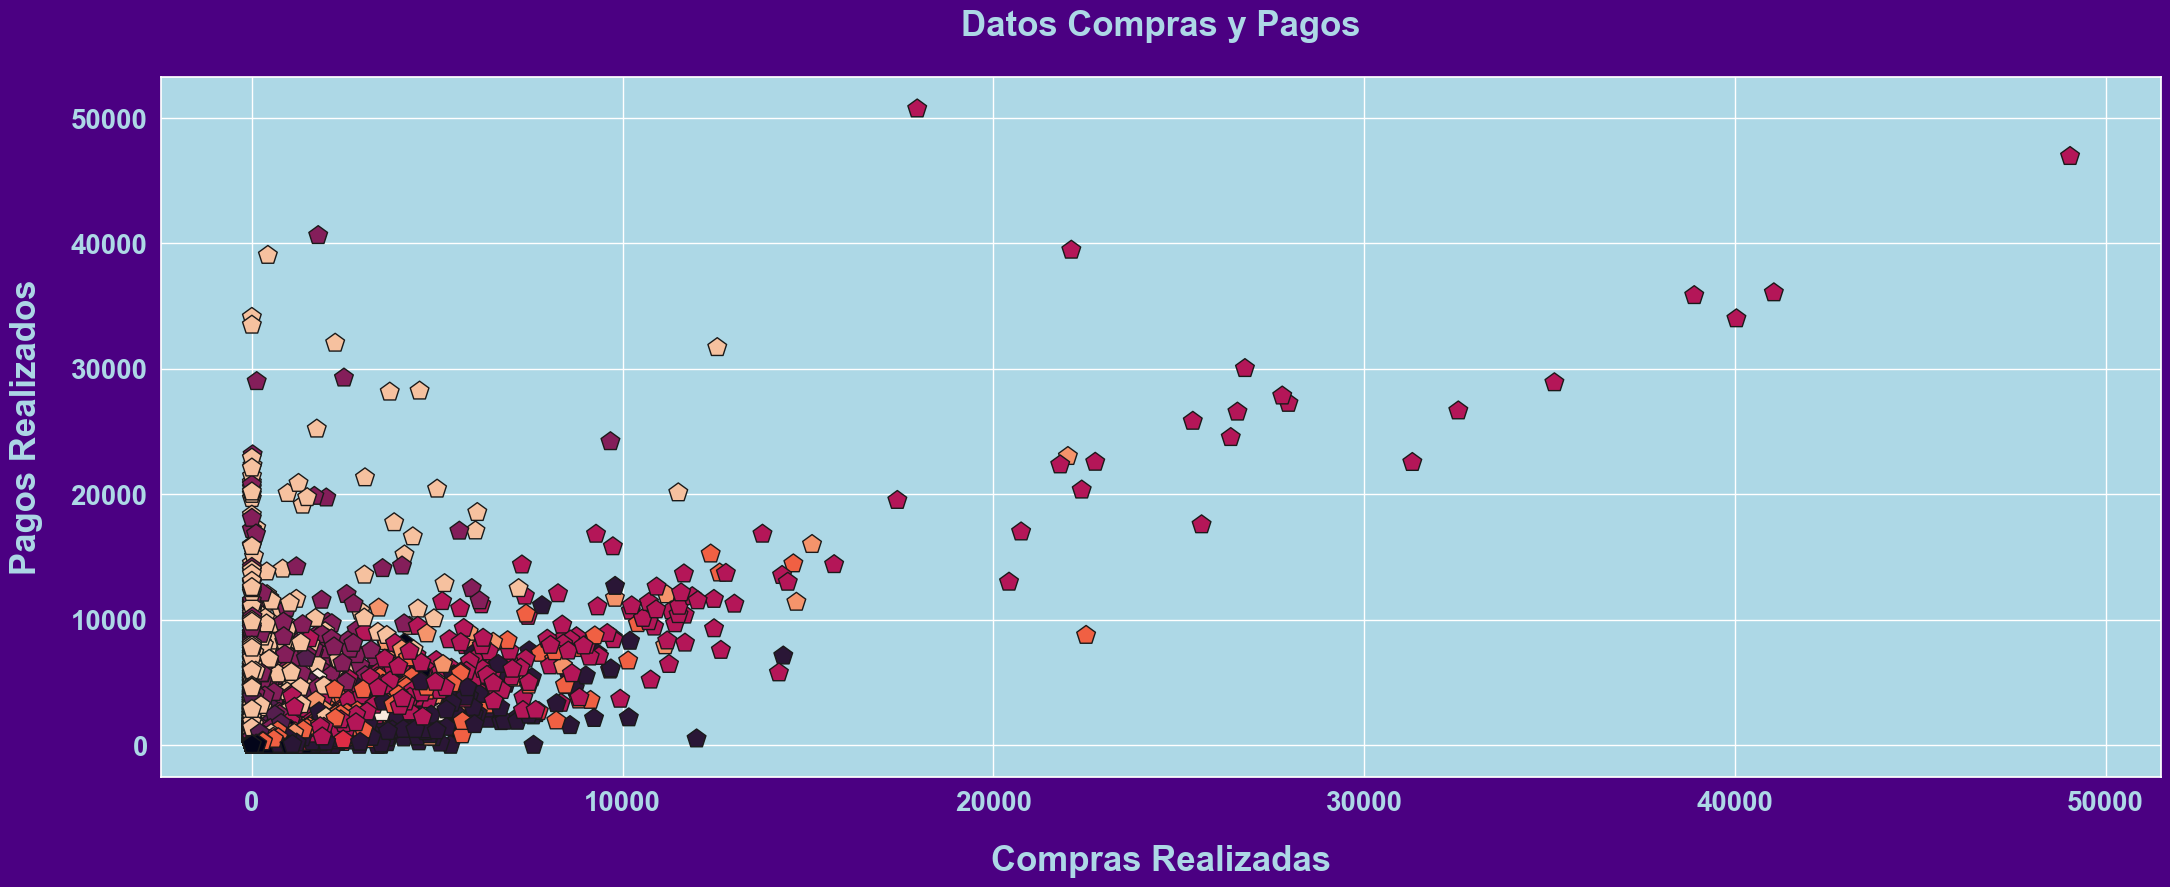

In [17]:
def grafico():
    sns.set_theme(rc={"axes.facecolor": "lightblue"})
    fig = plt.figure(figsize=(20,7), facecolor='indigo')
    eje = fig.add_axes([0,0,1,1])
    eje.scatter(dataset['PURCHASES'], dataset['PAYMENTS'], c=labels, edgecolor='k',s=200,marker='p')
    eje.set_title('Datos Compras y Pagos', size= 25, color='lightblue', fontweight='bold', pad=30)
    eje.set_xlabel('Compras Realizadas', size= 25, color='lightblue', fontweight='bold',labelpad=20)
    eje.set_ylabel('Pagos Realizados', size= 25, color='lightblue', fontweight='bold',labelpad=20)
    plt.xticks(color='lightblue', size=20, fontweight='bold')
    plt.yticks(color='lightblue', size=20, fontweight='bold')
    # plt.legend(['teperatura'], loc='best', fontsize=20, bbox_to_anchor=(1.15,0.7))
    plt.show()
grafico()

# 6. Entendiendo los valores de los atributos en los *clusters*

In [18]:
dataset.groupby('CLUSTER').describe()

BALANCE                                                     \
          count         mean          std         min          25%   
CLUSTER                                                              
0        2623.0   366.411089   740.576497    0.000000    18.969967   
1         727.0  1720.534920  1924.516951    0.000000   425.683507   
2        1072.0  2404.682137  2019.703986    1.691842   938.899499   
3         545.0  1339.592356  1592.769037    0.000000   241.223955   
4         535.0  1091.938184  1506.875345    6.793588   291.685729   
5         180.0  2086.999515  1798.245516   70.794108  1027.796519   
6         688.0   383.426834   708.241269    0.000000    64.425481   
7         401.0  2205.769441  2332.399703   70.954998  1035.549686   
8         631.0  1901.961547  2119.187653    0.000000   588.718367   
9        1548.0  3342.333116  2658.288110  137.507638  1382.275214   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
CLUSTER                                                                       
0          62.986919   287.850673   5462.897068            2623.0  0.758133   
1        1032.812458  2306.847056  15244.748650             727.0  0.935665   
2        1820.353126  3250.201794  11581.933500            1072.0  0.888271   
3         839.081567  1821.040307  13763.473580             545.0  0.801663   
4         561.003319  1220.886036  13479.288210             535.0  0.932830   
5        1500.634512  2570.055099  10571.411070             180.0  0.981116   
6         138.597143   344.838043   6725.109914             688.0  0.894178   
7        1370.317105  2363.489077  19043.138560             401.0  0.992776   
8        1130.827049  2333.603976  14581.459140             631.0  0.885933   
9        2403.467298  4663.445867  18495.558550            1548.0  0.998477   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
CLUSTER  ...                                                             
0        ...       222.284959   3933.230932           2623.0  0.254417   
1        ...       662.027957   6340.898794            727.0  0.095967   
2        ...      1015.540431   8644.138069           1072.0  0.008076   
3        ...       669.585057   6687.965212            545.0  0.125965   
4        ...       510.090660  15914.484620            535.0  0.343129   
5        ...     13011.382695  76406.207520            180.0  0.012528   
6        ...       198.495672   6703.880744            688.0  0.418546   
7        ...      2549.226889  18621.013310            401.0  0.008736   
8        ...       931.361950  21235.065300            631.0  0.133047   
9        ...      1450.698055   8345.641905           1548.0  0.000059   

                                                           
              std  min  25%       50%       75%       max  
CLUSTER                                                    
0        0.348713  0.0  0.0  0.000000  0.454545  1.000000  
1        0.245832  0.0  0.0  0.000000  0.000000  1.000000  
2        0.044417  0.0  0.0  0.000000  0.000000  0.600000  
3        0.233795  0.0  0.0  0.000000  0.111111  1.000000  
4        0.382392  0.0  0.0  0.166667  0.727273  1.000000  
5        0.048018  0.0  0.0  0.000000  0.000000  0.400000  
6        0.381157  0.0  0.0  0.333333  0.818182  1.000000  
7        0.055669  0.0  0.0  0.000000  0.000000  0.833333  
8        0.191329  0.0  0.0  0.083333  0.166667  1.000000  
9        0.002311  0.0  0.0  0.000000  0.000000  0.090909  

[10 rows x 128 columns]

In [19]:
kmeans.cluster_centers_

array([[5.57658852e-02, 2.19520032e-04, 9.57287618e-02, 3.62255985e-02,
        5.95710358e-02, 2.04445434e-02, 1.60544320e-04, 2.98888488e-05,
        1.29966334e-04, 7.65316677e-06, 1.19929406e-04, 2.51645446e-03,
        9.63698794e-01, 1.26735473e-01, 5.29594167e-02, 7.35130136e-05],
       [2.34884037e-01, 2.14677638e-04, 3.56590844e-01, 2.81184517e-01,
        7.54126826e-02, 3.69455487e-02, 1.44500893e-04, 1.00303365e-04,
        8.12902572e-05, 1.18243814e-05, 2.11121785e-04, 4.61722541e-03,
        7.74047800e-01, 2.10567307e-01, 8.48582948e-02, 1.64814338e-05],
       [3.69884138e-01, 2.31023459e-04, 4.00625965e-02, 2.32679045e-02,
        1.67997035e-02, 5.04716984e-01, 4.77709905e-05, 1.61814630e-05,
        3.15536857e-05, 8.01488452e-05, 1.80365534e-03, 7.97565218e-04,
        7.10225128e-01, 1.44985981e-01, 1.30766680e-01, 2.33857195e-06],
       [1.95111564e-01, 2.11409794e-04, 9.67906163e-02, 5.77872790e-02,
        3.90135943e-02, 1.01422132e-01, 8.86490762e-05, 3.633

In [20]:
dataset.drop(columns='CLUSTER', inplace=True)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=dataset.columns)
round(centroids.var(),3).sort_values(ascending=False)

MINIMUM_PAYMENTS                    0.067
CREDIT_LIMIT                        0.041
PAYMENTS                            0.038
CASH_ADVANCE                        0.037
PURCHASES                           0.029
BALANCE                             0.028
ONEOFF_PURCHASES                    0.017
INSTALLMENTS_PURCHASES              0.010
BALANCE_FREQUENCY                   0.000
PURCHASES_FREQUENCY                 0.000
ONEOFF_PURCHASES_FREQUENCY          0.000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000
CASH_ADVANCE_FREQUENCY              0.000
CASH_ADVANCE_TRX                    0.000
PURCHASES_TRX                       0.000
PRC_FULL_PAYMENT                    0.000
dtype: float64

In [21]:
dataset['CLUSTER']=labels

columnas_a_describir = ['PURCHASES', 'BALANCE', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
dataset.groupby('CLUSTER')[columnas_a_describir].describe()

PURCHASES                                                        \
            count         mean          std     min       25%       50%   
CLUSTER                                                                   
0          2623.0   511.608231   620.675037    0.00   110.000   299.840   
1           727.0  2460.885365  1857.943750  160.00  1139.795  1944.640   
2          1072.0   230.674487   447.161534    0.00     0.000     0.000   
3           545.0   614.058679   931.548206    0.00     4.990   277.060   
4           535.0  4853.018243  5905.137108  229.00  1676.425  3005.250   
5           180.0   442.881556   829.953640    0.00     0.000   159.500   
6           688.0  1752.592413  1891.809677   92.46   599.750  1177.320   
7           401.0  1441.767357  2114.738185    0.00   469.920   817.940   
8           631.0   455.164342  1106.700021    0.00     0.000     0.000   
9          1548.0   334.949451   651.764842    0.00     0.000    57.785   

                            BALANCE               ...     PAYMENTS  \
              75%       max   count         mean  ...          75%   
CLUSTER                                           ...                
0         678.340   5491.79  2623.0   366.411089  ...   888.102946   
1        3294.405  14332.92   727.0  1720.534920  ...  2134.698640   
2         296.280   3848.92  1072.0  2404.682137  ...  1243.827269   
3         815.900   9670.84   545.0  1339.592356  ...  5175.714855   
4        5711.340  49039.57   535.0  1091.938184  ...  5775.740704   
5         501.030   7739.48   180.0  2086.999515  ...  1125.469197   
6        2308.880  22500.00   688.0   383.426834  ...  2145.481612   
7        1499.120  22009.92   401.0  2205.769441  ...  2010.589640   
8         472.970  12551.95   631.0  1901.961547  ...  6297.961001   
9         385.175   5715.00  1548.0  3342.333116  ...  1348.262196   

                      MINIMUM_PAYMENTS                              \
                  max            count          mean           std   
CLUSTER                                                              
0         8130.112361           2623.0    209.097835    196.897142   
1        12667.905270            727.0    548.620936    617.904551   
2         9438.180272           1072.0    787.388699    746.146791   
3        40627.595240            545.0    563.542479    705.526486   
4        50721.483360            535.0    548.527072   1163.470850   
5         8735.607835            180.0  10561.300558  11258.316873   
6        15246.115940            688.0    276.865452    516.103897   
7        23018.575830            401.0   2160.007050   2347.860526   
8        39048.597620            631.0    782.564644   1267.386023   
9         9542.247486           1548.0   1110.111467    952.888189   

                                                                           
                min          25%          50%           75%           max  
CLUSTER                                                                    
0          0.019163   114.825421   167.726633    222.284959   3933.230932  
1         20.887671   193.918877   318.083871    662.027957   6340.898794  
2          8.561540   312.343947   541.288087   1015.540431   8644.138069  
3          1.334075   183.039309   334.301206    669.585057   6687.965212  
4         14.242628   173.604291   229.157755    510.090660  15914.484620  
5        599.549300  3449.504097  7087.691929  13011.382695  76406.207520  
6          2.167809   139.023204   170.979621    198.495672   6703.880744  
7        189.459157   856.508162  1336.476251   2549.226889  18621.013310  
8          1.721007   237.365669   461.041625    931.361950  21235.065300  
9        152.279898   442.295355   769.833670   1450.698055   8345.641905  

[10 rows x 48 columns]

In [22]:
description = round(dataset.groupby('CLUSTER')[columnas_a_describir].mean(),2)
description

,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
CLUSTER,,,,,,
0,511.61,366.41,122.53,5305.48,680.92,209.10
1,2460.89,1720.53,253.09,5432.87,1548.58,548.62
2,230.67,2404.68,3106.90,4466.88,936.20,787.39
3,614.06,1339.59,759.00,4588.28,4093.58,563.54
4,4853.02,1091.94,270.69,4078.04,4896.77,548.53
5,442.88,2087.00,564.85,2363.06,935.65,10561.30
6,1752.59,383.43,54.30,3112.99,1603.50,276.87
7,1441.77,2205.77,433.43,2446.13,1775.90,2160.01
8,455.16,1901.96,4291.11,3742.08,5083.38,782.56


In [23]:
description['N_CUSTOMERS'] = dataset.CLUSTER.value_counts()
description.sort_values(by='N_CUSTOMERS', ascending=False)

,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,N_CUSTOMERS
CLUSTER,,,,,,,
0,511.61,366.41,122.53,5305.48,680.92,209.10,2623
9,334.95,3342.33,869.44,4507.59,1003.88,1110.11,1548
2,230.67,2404.68,3106.90,4466.88,936.20,787.39,1072
1,2460.89,1720.53,253.09,5432.87,1548.58,548.62,727
6,1752.59,383.43,54.30,3112.99,1603.50,276.87,688
8,455.16,1901.96,4291.11,3742.08,5083.38,782.56,631
3,614.06,1339.59,759.00,4588.28,4093.58,563.54,545
4,4853.02,1091.94,270.69,4078.04,4896.77,548.53,535
7,1441.77,2205.77,433.43,2446.13,1775.90,2160.01,401


# 7. Interpretando los *clusters*

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases 

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user


In [24]:
description

,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,N_CUSTOMERS
CLUSTER,,,,,,,
0,511.61,366.41,122.53,5305.48,680.92,209.10,2623
1,2460.89,1720.53,253.09,5432.87,1548.58,548.62,727
2,230.67,2404.68,3106.90,4466.88,936.20,787.39,1072
3,614.06,1339.59,759.00,4588.28,4093.58,563.54,545
4,4853.02,1091.94,270.69,4078.04,4896.77,548.53,535
5,442.88,2087.00,564.85,2363.06,935.65,10561.30,180
6,1752.59,383.43,54.30,3112.99,1603.50,276.87,688
7,1441.77,2205.77,433.43,2446.13,1775.90,2160.01,401
8,455.16,1901.96,4291.11,3742.08,5083.38,782.56,631


CLUSTER 0:Medianamente realiza gastos con compras

CLUSTER 1:paga algo bien

CLUSTER 2:Menos realiza gastos con compras

CLUSTER 3:Paga medianamente bien

CLUSTER 4:El segundo grupo que mejor paga

CLUSTER 5:Paga muy poco

CLUSTER 6:Más saldo disponible para compras. El que mejor paga

CLUSTER 7:Menos saldo disponible para compras

CLUSTER 8:Solicita menos adelantos en efectivo

CLUSTER 9:Solicita adelantos en efectivo. Peor para pagar



In [47]:
porcentaje_mean = dataset.groupby('CLUSTER')['PRC_FULL_PAYMENT'].mean()*100

In [48]:
def porcentaje_clusters():
    contador = -1
    for porc in porcentaje_mean:
        contador += 1
        print(f'El porcentaje de pago CLUSTER {contador} es: {round(porc, 2)} %')
porcentaje_clusters()    

El porcentaje de pago CLUSTER 0 es: 25.44 %
El porcentaje de pago CLUSTER 1 es: 9.6 %
El porcentaje de pago CLUSTER 2 es: 0.81 %
El porcentaje de pago CLUSTER 3 es: 12.6 %
El porcentaje de pago CLUSTER 4 es: 34.31 %
El porcentaje de pago CLUSTER 5 es: 1.25 %
El porcentaje de pago CLUSTER 6 es: 41.85 %
El porcentaje de pago CLUSTER 7 es: 0.87 %
El porcentaje de pago CLUSTER 8 es: 13.3 %
El porcentaje de pago CLUSTER 9 es: 0.01 %
